In [5]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

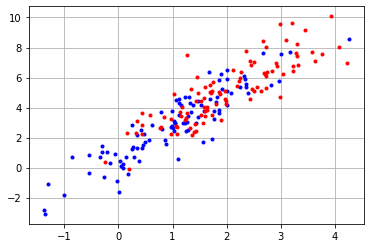

In [6]:
np.random.seed(12345)
nd = 100
x1p = np.random.randn(nd)+1
x1n = np.random.randn(nd)+2

x2p = x1p *2 + 1 + np.random.randn(nd)
x2n = x1n *2 + 1 + np.random.randn(nd)

x1 = np.concatenate([x1p, x1n])
x2 = np.concatenate([x2p, x2n])

xs = np.vstack([x1, x2]) #now the index for data point is the second index.
ys = np.concatenate([[1]*nd, [-1]*nd])
plt.plot(x1[ys>0], x2[ys>0], '.b')
plt.plot(x1[ys<0], x2[ys<0], '.r')
plt.grid(True)


In [7]:
xs.shape

(2, 200)

In [13]:
np.std(x1)

1.1040407788481097

1) Normalize the data so that the mean of each feature is 0 and standard deviation of each feature is 1.

In [21]:
norm_x1 = (x1 - np.mean(x1))/np.std(x1)
norm_x2 = (x2 - np.mean(x2))/np.std(x2)

norm_xs = np.vstack([norm_x1, norm_x2])

In [18]:
np.mean(norm_x1), np.std(norm_x1)

(3.552713678800501e-17, 1.0)

In [19]:
np.mean(norm_x2), np.std(norm_x2)

(-7.105427357601002e-17, 1.0)

2) What is the criteria for picking better axis?

In [ ]:
# get one with maximum variance

3) What is the size of the covariance matrix? Why?

In [25]:
# n_feature x n_feature

covariance = np.cov(norm_xs)
covariance

array([[1.00502513, 0.9100822 ],
       [0.9100822 , 1.00502513]])

4) Find eigenvalue and eigenvector of the covariance matrix.

In [27]:
evalues, evectors = np.linalg.eig(covariance)

In [28]:
evalues

array([1.91510732, 0.09494293])

In [29]:
evectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [42]:
np.dot(covariance,evectors[:,0]) # = lambda * evec

array([1.35418538, 1.35418538])

In [43]:
evalues[0]* evectors[:,0]

array([1.35418538, 1.35418538])

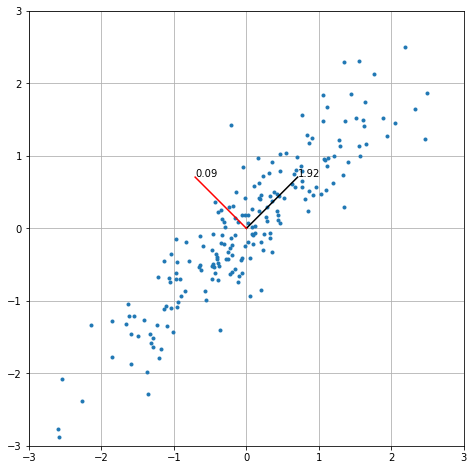

In [54]:
plt.figure(figsize=(8,8))
plt.plot(norm_xs[0, :], norm_xs[1, :], '.')
v0 = evectors[:, 0]
plt.plot([0, v0[0]], [0, v0[1]], '-k')
v1 = evectors[:, 1]
plt.plot([0, v1[0]], [0, v1[1]], '-r')
plt.xlim(-3,3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.text(v0[0], v0[1], f'{evalues[0]:.2f}') # A black
plt.text(v1[0], v1[1], f'{evalues[1]:.2f}') # B red
plt.grid()

5) Draw the eigenvectors on the plot.

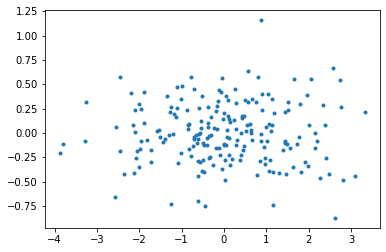

In [66]:
rotated_features_0 = np.dot(norm_xs.T, v0) # rotated reature on axis 0
rotated_features_1 = np.dot(norm_xs.T, v1) # rotated reature on axis 1

plt.plot(rotated_features_0, rotated_features_1, '.')

In [70]:
np.var(rotated_features_0)

1.9055317880978748

In [71]:
1.91510732

1.91510732

6) Use eigenvector and compute the transformed feature vector.

7) Plot transformed data point.

# Handwritten Digit Recognition.

In [72]:
D = loadmat('usps_resampled/usps_resampled.mat')
print(D)
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Fri Dec  3 17:13:58 2004', '__version__': '1.0', '__globals__': [], 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ...,
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.93247736, -0.99999988, ..., -0.99999988,
        -0.99563289, -0.99999988],
       [-0.99916363, -0.99033844, -0.99999988, ..., -0.99999988,
        -0.99974871, -0.99999988]]), 'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1

(256, 4649)


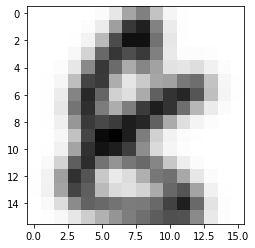

In [77]:
images = D['train_patterns']
print(images.shape)
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='none', cmap=cm.Greys)
show(images[:,9])

In [88]:
# normalize
mean = np.mean(images, axis=1)[:, None]
std = np.std(images, axis=1)[:, None]
norm_images = (images - mean)/std

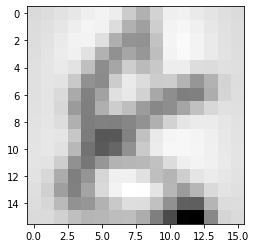

In [91]:
# covariance matrix

In [89]:
np.mean(norm_images[2,:]) # second pixel of every sample

-7.947563402780213e-17

In [90]:
np.std(norm_images[2,:])

1.0000000000000062

In [79]:
np.mean(images, axis=1).shape

(256,)

In [ ]:
np.subtract()

array([[-0.99098015],
       [-0.9705964 ],
       [-0.92796764],
       [-0.84986123],
       [-0.73052046],
       [-0.57329161],
       [-0.38771141],
       [-0.22858277],
       [-0.22246848],
       [-0.36032531],
       [-0.52868878],
       [-0.68053809],
       [-0.80570042],
       [-0.89766211],
       [-0.95556647],
       [-0.98606862],
       [-0.98042561],
       [-0.93700145],
       [-0.84447777],
       [-0.6825739 ],
       [-0.46331294],
       [-0.2274891 ],
       [-0.00157403],
       [ 0.17118465],
       [ 0.1650848 ],
       [-0.0022585 ],
       [-0.20082252],
       [-0.4135843 ],
       [-0.62991823],
       [-0.80363102],
       [-0.91292481],
       [-0.97120318],
       [-0.97054556],
       [-0.90674408],
       [-0.77173357],
       [-0.55063507],
       [-0.29790633],
       [-0.1010516 ],
       [ 0.0338596 ],
       [ 0.12790321],
       [ 0.10030356],
       [-0.0165799 ],
       [-0.12366863],
       [-0.27788625],
       [-0.51175716],
       [-0